In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [2]:
sys_details = tf.sysconfig.get_build_info()

cuda_version = sys_details["cuda_version"]
print(cuda_version)

#-----
cudnn_version = sys_details["cudnn_version"]

print(cudnn_version)

#--------
cuda_compute_capabilities = sys_details["cuda_compute_capabilities"]

print(cuda_compute_capabilities)

64_110
64_8
['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']


In [3]:
from tensorflow.python.client import device_lib

print(tf.config.list_physical_devices('GPU'))
print()
print(device_lib.list_local_devices())


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15616442766984138352
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1428674969
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3287198957208535579
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Plan

1. run the CNN-RNN architecture from "Show and Tell" (copy the network  and download the trained weights)
 - test it on mscoc
 - try it with the brain data
2. add attention mechanism
3. Use transformer network

---

    To make it possible to train the network on a cluster the actual network will be written into a .py file, while this    notebook is used to analyse the results.
    
---

In [1]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as sio

In [2]:
dataDir='C:\\Users\\giess\\OneDrive\\Documents\\University\\Master\\Masters Thesis\\Data'
dataType='train2017'
annFile='{}\\annotations\\instances_{}.json'.format(dataDir,dataType)

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=29.37s)
creating index...
index created!


In [4]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
appliance sports kitchen indoor person outdoor accessory animal vehicle food furniture electronic


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
print(imgIds)
rng_image = imgIds[np.random.randint(0,len(imgIds))]
img = coco.loadImgs(rng_image)[0]
print(rng_image)
# img = coco.loadImgs(imgIds[0])[0]

[1, 18, 41]
[379520, 55809, 46978, 438915, 500100, 209028, 89350, 341623, 306440, 76937, 372874, 22796, 282768, 360595, 366484, 410005, 172310, 449560, 557721, 22427, 365340, 363549, 354721, 47909, 125351, 312233, 28842, 304173, 241837, 560561, 88754, 429236, 536244, 380724, 55478, 23737, 377278, 411583, 476736, 461632, 463044, 569158, 102599, 231240, 296782, 48595, 558036, 518613, 441470, 493020, 297692, 162396, 547421, 176229, 392166, 251368, 255209, 353644, 155117, 551795, 556149, 45175, 568187, 158718, 575615]
353644


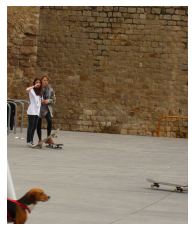

In [6]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
# I = io.imread(img['coco_url'])
I = sio.imread(img['coco_url'])

plt.axis('off')
plt.imshow(I)
plt.show()

In [7]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.44s)
creating index...
index created!


Two young girls on skateboards with a beagle in the front.
There are two people standing near a skateboard and a dog.
Two girls on skateboards are looking toward a skateboard that does not have a rider.
A teenage girl and boy skateboarding beside an old building.
A teen boy and teen girl standing on skateboards in front of a stone brick wall.


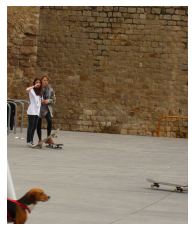

In [8]:
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [ ]:
# nms=[cat['name'] for cat in cats]
catIds = coco.getCatIds(range(1,91)) #[1,90]
imgIds = coco.getImgIds(catIds=catIds ) # (118287,)

img = coco.loadImgs(9)[0]






I = sio.imread(img['coco_url'])

plt.axis('off')
plt.imshow(I)
plt.show()

In [13]:
# THis is all I need to get the captions for a given image id (the id is the name of the image file without the 0's)

annIds = coco_caps.getAnnIds(25)
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

A giraffe eating food from the top of the tree.
A giraffe standing up nearby a tree 
A giraffe mother with its baby in the forest.
Two giraffes standing in a tree filled area.
A giraffe standing next to a forest filled with trees.
